In [1]:
import sys
from os.path import join
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
sys.path.append('/home/gcgreen2/alignment/SequenceAlignmentAndSketching')
import loc_minhash as lmh
from utils import seq_utils as su
from utils import hash_utils as hu

In [14]:
importlib.reload(lmh)

<module 'loc_minhash' from '/home/gcgreen2/alignment/SequenceAlignmentAndSketching/loc_minhash.py'>

In [20]:
importlib.reload(lmh.hu)

<module 'hash_utils' from '/home/gcgreen2/alignment/SequenceAlignmentAndSketching/utils/hash_utils.py'>

In [17]:
importlib.reload(hu)

<module 'utils.hash_utils' from '/home/gcgreen2/alignment/SequenceAlignmentAndSketching/utils/hash_utils.py'>

In [3]:
PROJ_DIR = '/home/gcgreen2/alignment'
ALN_DIR = join(PROJ_DIR, 'out/mh')
GT_DIR = join(PROJ_DIR, 'spectral_jaccard_similarity/groundTruths')
FASTA_DIR = join(PROJ_DIR, 'spectral_jaccard_similarity/filtered_fasta')
DATASETS = np.loadtxt(join(PROJ_DIR,'NCTC_list.txt'), dtype=str)

In [4]:
def load_dfs(dataset): # load the alignment files
    gt_path = join(GT_DIR, dataset+'_daligner_ground_truth.txt')
    aln_path = join(ALN_DIR, dataset+'_aln.tsv')
    gt_df = pd.read_csv(gt_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    aln_df = pd.read_csv(aln_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    return gt_df, aln_df

In [5]:
gt_df, aln_df = load_dfs(DATASETS[0])

In [6]:
aln_df = aln_df.sort_values('overlap', ascending=False)
aln_df.head()

,i1,i2,overlap,l1,l2
17686,182,956,3192.7,16320,26781
103118,956,182,3192.7,26781,16320
65456,616,861,3024.1,21913,21433
92767,861,616,3024.1,21433,21913
27295,272,956,2966.5,18564,26781


In [7]:
top_read_pairs = aln_df.iloc[:10,:2].values.tolist()

In [8]:
top_read_pairs

[[182, 956],
 [956, 182],
 [616, 861],
 [861, 616],
 [272, 956],
 [956, 272],
 [834, 821],
 [821, 834],
 [595, 995],
 [995, 595]]

# Location Differences

In [31]:
fasta_file = join(FASTA_DIR, DATASETS[0]+'_reads.fasta')
seqs = su.get_seqs(fasta_file)
top_reads = [[seqs[p[0]-1], seqs[p[1]-1]] for p in top_read_pairs]
loc_minhashes = [lmh.get_all_loc_minhashes(reads, k=16, n_hash=1000, n_bits=24) for reads in top_reads]

[182, 956] len1 16320 len2 26781
[956, 182] len1 26781 len2 16320
[616, 861] len1 21913 len2 21433
[861, 616] len1 21433 len2 21913
[272, 956] len1 18564 len2 26781
[956, 272] len1 26781 len2 18564
[834, 821] len1 17502 len2 18585
[821, 834] len1 18585 len2 17502
[595, 995] len1 19460 len2 17565
[995, 595] len1 17565 len2 19460


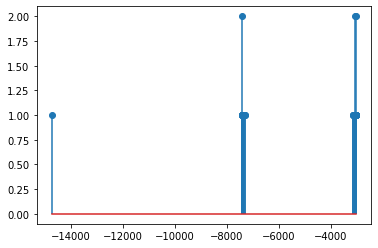

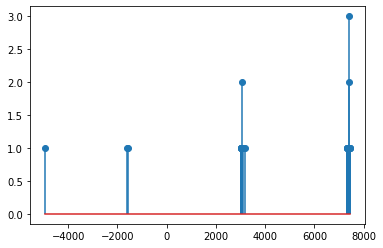

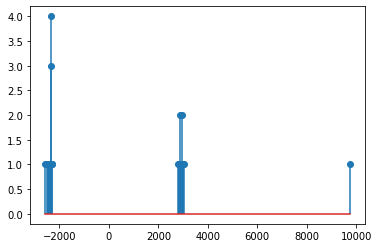

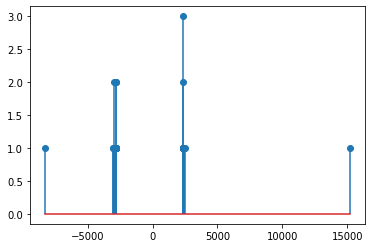

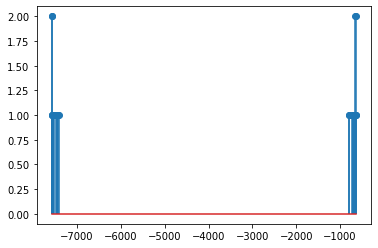

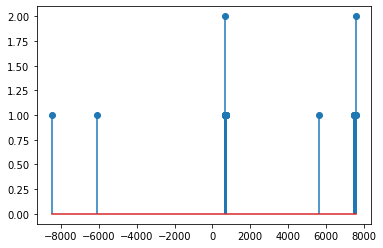

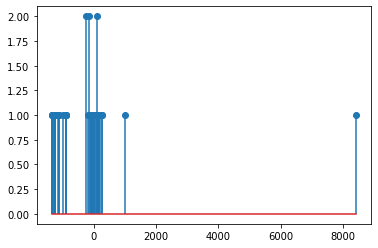

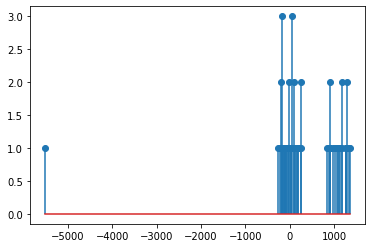

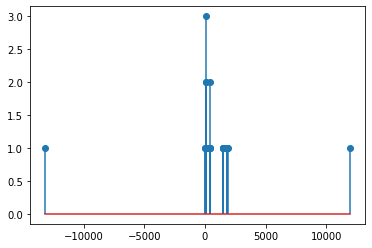

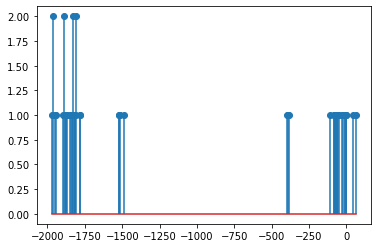

In [34]:
for i in range(len(loc_minhashes)):
    loc_minhashes1, loc_minhashes2 = loc_minhashes[i]
    len1, len2 = [len(r) for r in top_reads[i]]
    loc_diffs = lmh.overlap_est(loc_minhashes1, loc_minhashes2, len1, len2)
    print(top_read_pairs[i], 'len1',len1, 'len2',len2)
    diffs, counts = np.unique(loc_diffs, return_counts=True)
    plt.figure()
    plt.stem(diffs,counts)